# SQLAlchemy-Challenge

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import func, distinct
from datetime import datetime, timedelta
from flask import Flask, jsonify

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [9]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
twelve_prcp_df = pd.DataFrame(results, columns=['date', 'prcp'])
# Sort the dataframe by date
twelve_prcp_df=twelve_prcp_df.sort_values("date")

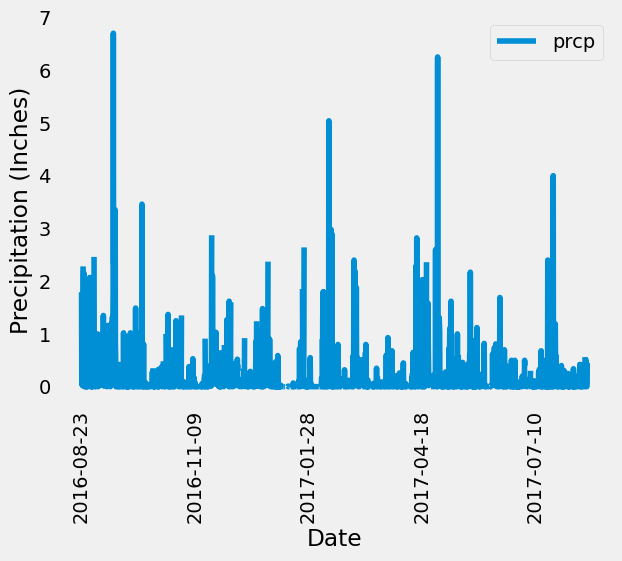

In [10]:
# Plot the data
twelve_prcp_df.plot(x='date', y='prcp', rot=90)

# Show the plot
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.grid()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data 
summary_statistics = twelve_prcp_df['prcp'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset          
total_stations = session.query(func.count(distinct(Measurement.station))).scalar()
print(total_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# This cell is for my reference of column names in Measurement
column_names = [column.name for column in Measurement.__table__.columns]
print(column_names)

['id', 'station', 'date', 'prcp', 'tobs']


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import func
most_active_station = 'USC00519281'  

temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

min_temp, max_temp, avg_temp = temperature_stats[0]

print(f"Lowest Temperature: {min_temp}")
print(f"Highest Temperature: {max_temp}")
print(f"Average Temperature: {avg_temp}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from sqlalchemy import func
most_recent_date = datetime(2017, 8, 23)
last_year_date = most_recent_date - timedelta(days=365)

results = session.query(Measurement.tobs).filter(
    Measurement.station == most_active_station,
    Measurement.date >= last_year_date
).all()

results_df = pd.DataFrame(results)
print(results_df.head())


   tobs
0  77.0
1  80.0
2  80.0
3  75.0
4  73.0


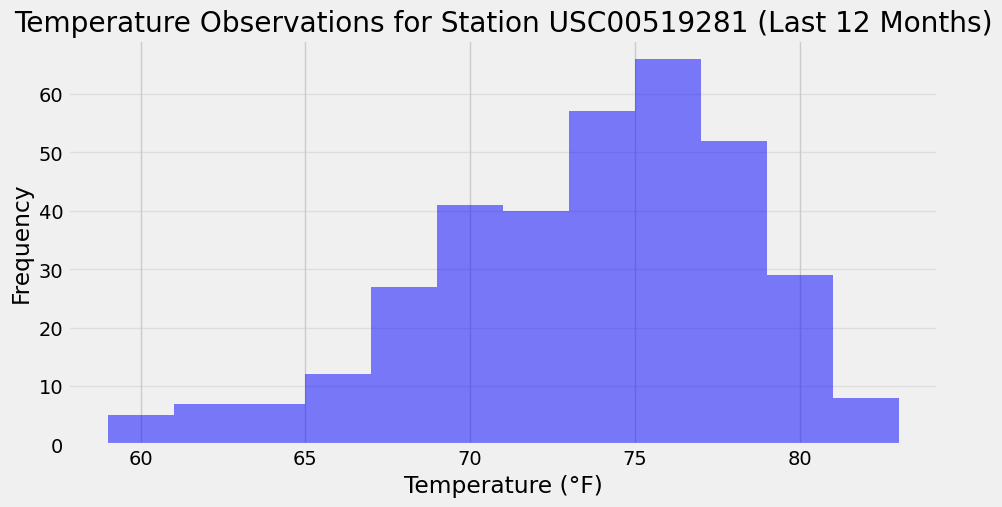

In [17]:
# Calculate the date 12 months ago from the most recent date in your dataset
most_recent_date = datetime(2017, 8, 23)  # Replace with the actual most recent date if different
last_year_date = most_recent_date - timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
results = session.query(Measurement.tobs).filter(
    Measurement.station == most_active_station,
    Measurement.date >= last_year_date
).all()

# Convert the results to a Pandas DataFrame
tobs_data = pd.DataFrame(results, columns=['tobs'])

# Plot the results as a histogram
plt.figure(figsize=(10, 5))
plt.hist(tobs_data['tobs'], bins=12, alpha=0.5, color='blue')
plt.title(f'Temperature Observations for Station {most_active_station} (Last 12 Months)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.50)
plt.show()

In [18]:
# Close Session
session.close()